<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data(y_hat)_multi_delta_(_0_4)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-0.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-0.4_n20.csv',
 'data_multi_delta_-0.4_n30.csv',
 'data_multi_delta_-0.4_n60.csv',
 'data_multi_delta_-0.4_n120.csv',
 'data_multi_delta_-0.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.4_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,35.130054,83.500829,66.986447,71.022939,1.025390,267.665660,266.761711,0.903949
1,0.0,1.0,83.784443,53.658793,63.433581,21.812413,0.619895,233.309124,232.688717,0.620407
2,0.0,2.0,59.847760,92.666329,57.202631,28.602284,0.213537,248.532541,248.446804,0.085736
3,0.0,3.0,69.490346,44.676934,32.109186,50.079436,-0.308283,206.047619,206.382424,-0.334805
4,0.0,4.0,93.198157,46.594379,37.533146,27.571790,-0.298289,214.599183,214.879026,-0.279843
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,77.627766,91.008624,71.644194,53.452997,-0.470299,303.263282,303.753472,-0.490190
119996,999.0,116.0,65.351092,46.244447,39.936786,94.489410,0.407536,256.429271,255.894946,0.534325
119997,999.0,117.0,67.187574,41.589916,94.542323,61.744077,-0.590336,274.473554,275.035988,-0.562433
119998,999.0,118.0,82.876146,64.821252,32.918631,70.185818,-0.099643,260.702204,260.701692,0.000512


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,35.130054,83.500829,66.986447,71.022939,1.025390,267.665660,266.761711,0.903949
1,0.0,1.0,83.784443,53.658793,63.433581,21.812413,0.619895,233.309124,232.688717,0.620407
2,0.0,2.0,59.847760,92.666329,57.202631,28.602284,0.213537,248.532541,248.446804,0.085736
3,0.0,3.0,69.490346,44.676934,32.109186,50.079436,-0.308283,206.047619,206.382424,-0.334805
4,0.0,4.0,93.198157,46.594379,37.533146,27.571790,-0.298289,214.599183,214.879026,-0.279843
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,77.627766,91.008624,71.644194,53.452997,-0.470299,303.263282,303.753472,-0.490190
119996,999.0,116.0,65.351092,46.244447,39.936786,94.489410,0.407536,256.429271,255.894946,0.534325
119997,999.0,117.0,67.187574,41.589916,94.542323,61.744077,-0.590336,274.473554,275.035988,-0.562433
119998,999.0,118.0,82.876146,64.821252,32.918631,70.185818,-0.099643,260.702204,260.701692,0.000512


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    35.130054  83.500829  66.986447  71.022939  1.025390  267.665660   
      1.0    83.784443  53.658793  63.433581  21.812413  0.619895  233.309124   
      2.0    59.847760  92.666329  57.202631  28.602284  0.213537  248.532541   
      3.0    69.490346  44.676934  32.109186  50.079436 -0.308283  206.047619   
      4.0    93.198157  46.594379  37.533146  27.571790 -0.298289  214.599183   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  77.627766  91.008624  71.644194  53.452997 -0.470299  303.263282   
      116.0  65.351092  46.244447  39.936786  94.489410  0.407536  256.429271   
      117.0  67.187574  41.589916  94.542323  61.744077 -0.590336  274.473554   
      118.0  82.876146  64.821252  32.918631  70.185818 -0.099643  260.702204   
      119.0  64.166006  48.380749  58.453375  80.213728  0.122034  261.335893   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    266.761711  0.903949  
      1.0    232.688717  0.620407  
      2.0    248.446804  0.085736  
      3.0    206.382424 -0.334805  
      4.0    214.879026 -0.279843  
...                 ...       ...  
999.0 115.0  303.753472 -0.490190  
      116.0  255.894946  0.534325  
      117.0  275.035988 -0.562433  
      118.0  260.701692  0.000512  
      119.0  261.131824  0.204069  

[120000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    35.130054  83.500829  66.986447  71.022939  1.025390  267.665660   
      1.0    83.784443  53.658793  63.433581  21.812413  0.619895  233.309124   
      2.0    59.847760  92.666329  57.202631  28.602284  0.213537  248.532541   
      3.0    69.490346  44.676934  32.109186  50.079436 -0.308283  206.047619   
      4.0    93.198157  46.594379  37.533146  27.571790 -0.298289  214.599183   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  77.627766  91.008624  71.644194  53.452997 -0.470299  303.263282   
      116.0  65.351092  46.244447  39.936786  94.489410  0.407536  256.429271   
      117.0  67.187574  41.589916  94.542323  61.744077 -0.590336  274.473554   
      118.0  82.876146  64.821252  32.918631  70.185818 -0.099643  260.702204   
      119.0  64.166006  48.380749  58.453375  80.213728  0.122034  261.335893   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    266.761711  0.903949  
      1.0    232.688717  0.620407  
      2.0    248.446804  0.085736  
      3.0    206.382424 -0.334805  
      4.0    214.879026 -0.279843  
...                 ...       ...  
999.0 115.0  303.753472 -0.490190  
      116.0  255.894946  0.534325  
      117.0  275.035988 -0.562433  
      118.0  260.701692  0.000512  
      119.0  261.131824  0.204069  

[120000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,35.130054,83.500829,66.986447,71.022939,1.025390,267.665660,266.761711,0.903949
1,0.0,1.0,83.784443,53.658793,63.433581,21.812413,0.619895,233.309124,232.688717,0.620407
2,0.0,2.0,59.847760,92.666329,57.202631,28.602284,0.213537,248.532541,248.446804,0.085736
3,0.0,3.0,69.490346,44.676934,32.109186,50.079436,-0.308283,206.047619,206.382424,-0.334805
4,0.0,4.0,93.198157,46.594379,37.533146,27.571790,-0.298289,214.599183,214.879026,-0.279843
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,77.627766,91.008624,71.644194,53.452997,-0.470299,303.263282,303.753472,-0.490190
119996,999.0,116.0,65.351092,46.244447,39.936786,94.489410,0.407536,256.429271,255.894946,0.534325
119997,999.0,117.0,67.187574,41.589916,94.542323,61.744077,-0.590336,274.473554,275.035988,-0.562433
119998,999.0,118.0,82.876146,64.821252,32.918631,70.185818,-0.099643,260.702204,260.701692,0.000512


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    35.130054  83.500829  66.986447  71.022939  1.025390  267.665660   
      1.0    83.784443  53.658793  63.433581  21.812413  0.619895  233.309124   
      2.0    59.847760  92.666329  57.202631  28.602284  0.213537  248.532541   
      3.0    69.490346  44.676934  32.109186  50.079436 -0.308283  206.047619   
      4.0    93.198157  46.594379  37.533146  27.571790 -0.298289  214.599183   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  77.627766  91.008624  71.644194  53.452997 -0.470299  303.263282   
      116.0  65.351092  46.244447  39.936786  94.489410  0.407536  256.429271   
      117.0  67.187574  41.589916  94.542323  61.744077 -0.590336  274.473554   
      118.0  82.876146  64.821252  32.918631  70.185818 -0.099643  260.702204   
      119.0  64.166006  48.380749  58.453375  80.213728  0.122034  261.335893   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    266.761711  0.903949  
      1.0    232.688717  0.620407  
      2.0    248.446804  0.085736  
      3.0    206.382424 -0.334805  
      4.0    214.879026 -0.279843  
...                 ...       ...  
999.0 115.0  303.753472 -0.490190  
      116.0  255.894946  0.534325  
      117.0  275.035988 -0.562433  
      118.0  260.701692  0.000512  
      119.0  261.131824  0.204069  

[120000 rows x 8 columns]

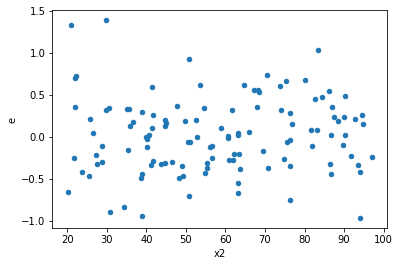

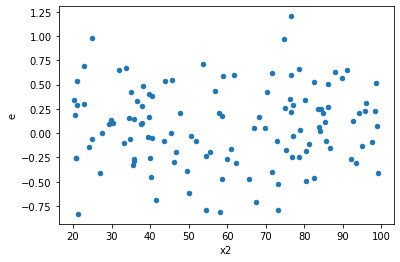

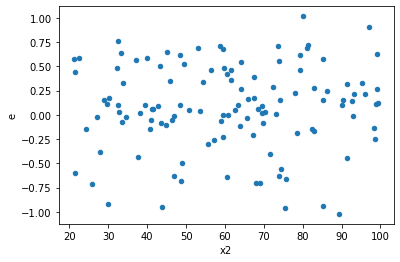

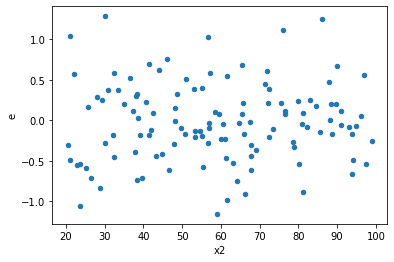

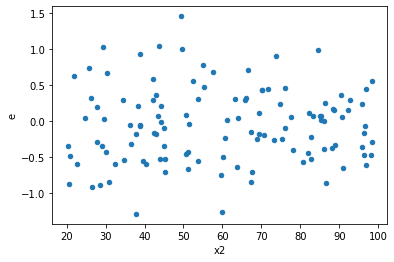

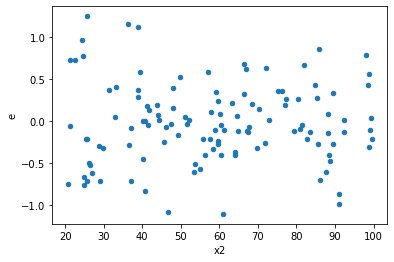

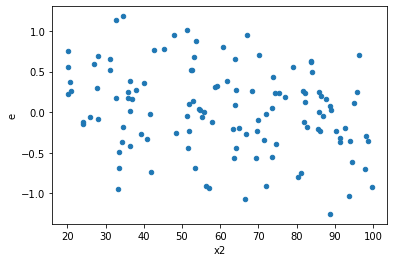

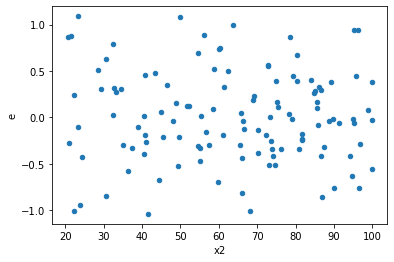

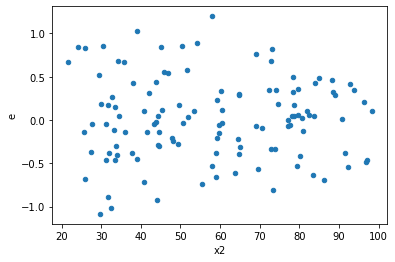

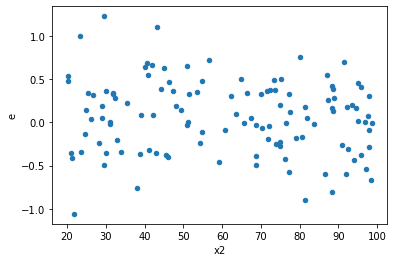

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,44.0,44.0,8.274298348215325,8.60938584794983,0.18805223518671194,0.19566786018067797,1.040497391516802,0.8958417328121737,0.5520791335939131,0.44792086640608686,Reject001=1 : Homoscedasticity
5.0,44.0,44.0,10.003223901427946,10.303167629495636,0.22734599775972605,0.23416290067035536,1.0299847060331093,0.9223854503804001,0.5388072748098,0.46119272519020005,Reject001=1 : Homoscedasticity
6.0,44.0,44.0,8.81797897229284,13.771147065176164,0.20040861300665547,0.3129806151176401,1.5617123956007128,0.1431573571731808,0.9284213214134096,0.0715786785865904,Reject001=1 : Homoscedasticity
9.0,44.0,44.0,7.1794278820255135,7.674912754030837,0.16316881550057985,0.17442983531888265,1.0690145343260322,0.825818124028451,0.5870909379857745,0.4129090620142255,Reject001=1 : Homoscedasticity
10.0,44.0,44.0,5.702391206179806,7.974152191273941,0.12959980014045014,0.18123073161986228,1.3983874313344509,0.2699099562416083,0.8650450218791959,0.13495497812080415,Reject001=1 : Homoscedasticity
11.0,44.0,44.0,6.861828133563283,7.134585511683916,0.15595063939916554,0.162149670720089,1.0397499577097382,0.8977165559987879,0.5511417220006061,0.44885827799939393,Reject001=1 : Homoscedasticity
16.0,44.0,44.0,6.771738497122714,8.998853833625123,0.15390314766187985,0.2045194053096619,1.3288838364695719,0.3492005038374939,0.825399748081253,0.17460025191874695,Reject001=1 : Homoscedasticity
17.0,44.0,44.0,9.214446114969052,9.217298747511762,0.20941922988566028,0.20948406244344914,1.0003095826387303,0.9991855239108884,0.5004072380445558,0.4995927619554442,Reject001=1 : Homoscedasticity
22.0,44.0,44.0,7.535687312207919,11.441693323278205,0.17126562073199816,0.2600384846199592,1.5183344065699889,0.16997160569150704,0.9150141971542465,0.08498580284575352,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,44.0,44.0,10.197967809695916,6.922415035409758,0.23177199567490717,0.15732761444113086,0.6788033816725856,0.20276243646964498,Reject001=1 : Homoscedasticity
1.0,44.0,44.0,6.985050298213489,5.670814078584724,0.15875114314121566,0.1288821381496528,0.8118501423010658,0.49222006822647757,Reject001=1 : Homoscedasticity
2.0,44.0,44.0,8.274298348215325,8.60938584794983,0.18805223518671194,0.19566786018067797,1.040497391516802,0.8958417328121737,Reject001=1 : Homoscedasticity
3.0,44.0,44.0,13.551785208879538,6.900234743505506,0.30799511838362587,0.15682351689785243,0.5091753327808255,0.02742373724753744,Reject001=1 : Homoscedasticity
4.0,44.0,44.0,14.453899967093182,7.814423929850433,0.32849772652484505,0.1776005438602371,0.5406446666741384,0.04415820150488969,Reject001=1 : Homoscedasticity
5.0,44.0,44.0,10.003223901427946,10.303167629495636,0.22734599775972605,0.23416290067035536,1.0299847060331093,0.9223854503804001,Reject001=1 : Homoscedasticity
6.0,44.0,44.0,8.81797897229284,13.771147065176164,0.20040861300665547,0.3129806151176401,1.5617123956007128,0.1431573571731808,Reject001=1 : Homoscedasticity
7.0,44.0,44.0,10.774035272290895,10.183582621753734,0.24486443800661126,0.23144505958531214,0.9451967034064097,0.8525536889358032,Reject001=1 : Homoscedasticity
8.0,44.0,44.0,11.42125568429634,7.125288344826393,0.25957399282491683,0.1619383714733271,0.623862081524303,0.1214015247590154,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      978
Reject001=0 : Heteroscedasticity     22
Name: Result_test, dtype: int64